In [1]:
import pandas as pd
import seaborn as sns; sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import os
from IPython import display
from PIL import Image

### Metrics report

In [2]:
df = pd.DataFrame()

In [3]:
data_list = os.listdir("results/regular/")

In [4]:
for data in data_list:
    if ".csv" in data:
        new_df = pd.read_csv("results/regular/" + data)
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)

In [5]:
#vqc_list = os.listdir("")
vqc_df = pd.read_csv("vqc_results/train_process/su2_spsa_2.csv")
vqc_df["model"] = "VQC"
df = pd.concat([df, vqc_df], axis = 0).reset_index(drop=True)

In [6]:
df = df.fillna(0)
df

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,elapsed,model,tau,C,feature_map_type,optimizer,objective_vals,Ansatz,Training time,Model,Max Iter,reps
0,0.278571,0.785276,0.909953,0.178082,0.690647,0.639344,146.039537,Pegasos QSVC,300.0,750.0,0,0,0,0,0.000000,0,0.0,0.0
1,0.300283,0.940754,0.939068,0.181507,0.942446,0.868852,0.005085,Decision Tree,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
2,0.059195,0.666667,0.500000,0.030500,1.000000,1.000000,0.003429,Logistic Regression,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
3,0.189474,0.818018,0.819495,0.108696,0.816547,0.737705,0.003134,Naive Bayes,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
4,0.315217,0.951872,0.943463,0.188925,0.960432,0.950820,0.110404,Random Forest,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
5,0.328267,0.914286,0.907801,0.201493,0.920863,0.885246,0.017958,SVC,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
6,0.288000,0.958106,0.970480,0.171975,0.946043,0.885246,1816.435473,QSVC,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
7,0.159624,0.648421,0.781726,0.093151,0.553957,0.557377,4218.756788,VQC,0.0,0.0,Pauli,spsa,"[1.0188084155950745, 1.0042282910870919, 1.018...",su2,4218.756788,VQC,250.0,2.0


In [7]:
f1 = df[["model", "f1_train", "f1_test"]]
f1

,model,f1_train,f1_test
0,Pegasos QSVC,0.785276,0.278571
1,Decision Tree,0.940754,0.300283
2,Logistic Regression,0.666667,0.059195
3,Naive Bayes,0.818018,0.189474
4,Random Forest,0.951872,0.315217
5,SVC,0.914286,0.328267
6,QSVC,0.958106,0.288000
7,VQC,0.648421,0.159624


In [8]:
prec = df[["model", "prec_train", "prec_test"]]
prec

,model,prec_train,prec_test
0,Pegasos QSVC,0.909953,0.178082
1,Decision Tree,0.939068,0.181507
2,Logistic Regression,0.500000,0.030500
3,Naive Bayes,0.819495,0.108696
4,Random Forest,0.943463,0.188925
5,SVC,0.907801,0.201493
6,QSVC,0.970480,0.171975
7,VQC,0.781726,0.093151


In [9]:
recall = df[["model", "recall_train", "recall_test"]]
recall

,model,recall_train,recall_test
0,Pegasos QSVC,0.690647,0.639344
1,Decision Tree,0.942446,0.868852
2,Logistic Regression,1.000000,1.000000
3,Naive Bayes,0.816547,0.737705
4,Random Forest,0.960432,0.950820
5,SVC,0.920863,0.885246
6,QSVC,0.946043,0.885246
7,VQC,0.553957,0.557377


### Confusion Matrix Report

In [10]:
conf_list = os.listdir("conf")
for conf in conf_list:
    if "png" not in conf:
        conf_list.remove(conf)
conf_list

['nb.png',
 'lr.png',
 '.ipynb_checkpoints',
 'decision_tree.png',
 'rf.png',
 'svc.png',
 'qsvc.png']

In [11]:
for i in range(len(conf_list)):
    if ".png" in conf_list[i]:
        conf_list[i] = "conf/" + conf_list[i]
conf_list

['conf/nb.png',
 'conf/lr.png',
 '.ipynb_checkpoints',
 'conf/decision_tree.png',
 'conf/rf.png',
 'conf/svc.png',
 'conf/qsvc.png']

In [12]:
conf_list.append("conf/pegasos_conf_test/100_500.png")
conf_list.append("vqc_conf/vqc_best.png")

In [13]:
conf_list.remove(".ipynb_checkpoints")
conf_list

['conf/nb.png',
 'conf/lr.png',
 'conf/decision_tree.png',
 'conf/rf.png',
 'conf/svc.png',
 'conf/qsvc.png',
 'conf/pegasos_conf_test/100_500.png',
 'vqc_conf/vqc_best.png']

### SVC Family Report

In [14]:
feature_list = os.listdir("results/runtime_features/")
feature_df = pd.DataFrame()
for data in feature_list:
    if ".csv" in data:
        new_df = pd.read_csv("results/runtime_features/" + data)
        feature_df = pd.concat([feature_df, new_df], axis = 0).reset_index(drop=True)

In [15]:
def svc_chart_gen_features():
    svc = feature_df[feature_df["model"].isin(["SVC_linear", "SVC_rbf"])]
    qsvc = feature_df[feature_df["model"]=="QSVC"]
    pegasos_qsvc = feature_df[feature_df["model"] =="Pegasos QSVC"]
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (20, 16))
    sns.lineplot(x = "num_features", y = "runtime", data = svc, hue = "model", ax = axes[0], marker="o")
    ax=axes[0]
    ax.set_title("SVC - Runtime vs Number of Features")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of Features", fontsize=10)
    sns.lineplot(x = "num_features", y = "runtime", data = qsvc, ax = axes[1], marker="o")
    ax = axes[1]
    ax.set_title("QSVC - Runtime vs Number of Features")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of Features", fontsize=10)
    sns.lineplot(x = "num_features", y = "runtime", data = pegasos_qsvc, ax = axes[2], marker="o")
    ax = axes[2]
    ax.set_title("Pegasos QSVC - Runtime vs Number of Features")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of Features", fontsize=10)

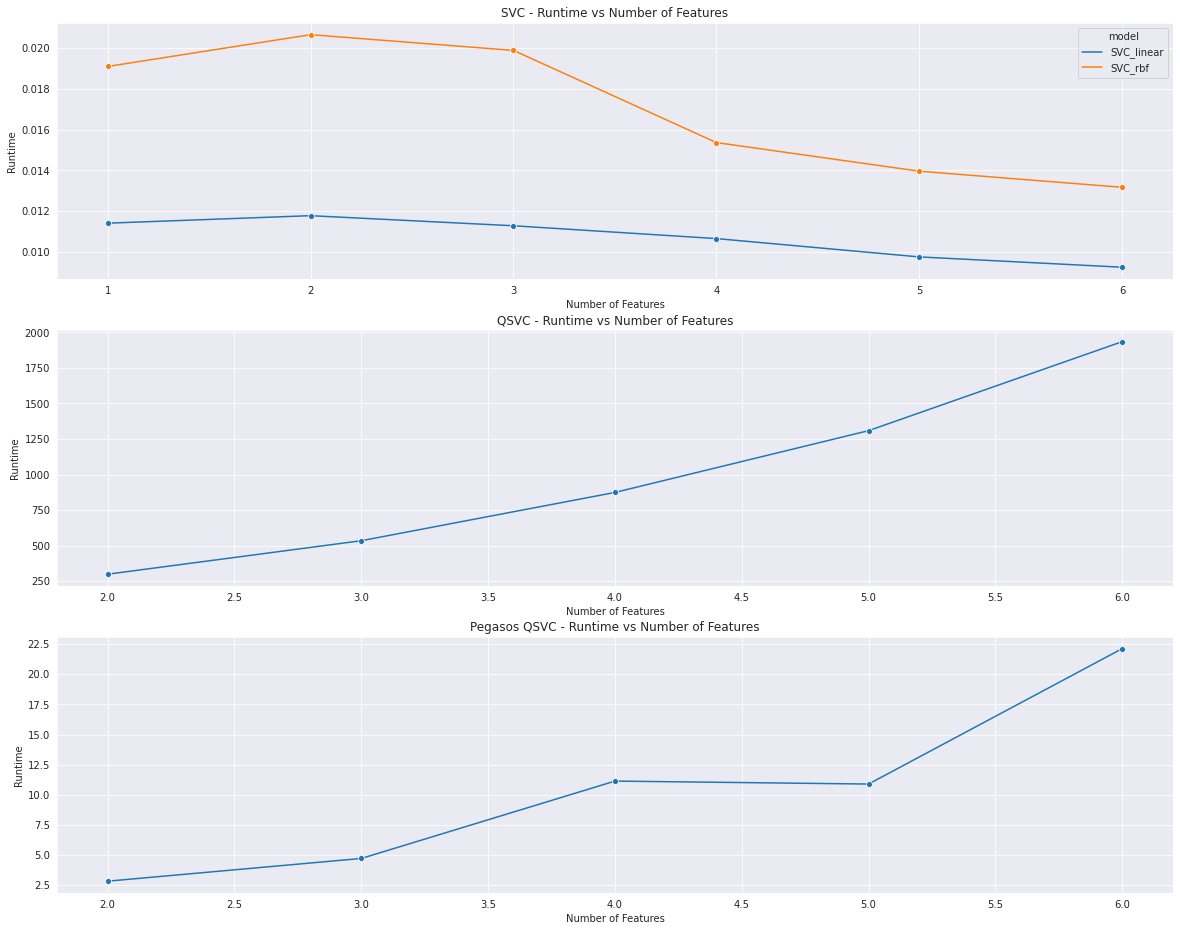

In [16]:
svc_chart_gen_features()

In [17]:
size_list = os.listdir("results/runtime_size/")
size_df = pd.DataFrame()
for data in size_list:
    if ".csv" in data:
        new_df = pd.read_csv("results/runtime_size/" + data)
        size_df = pd.concat([size_df, new_df], axis = 0).reset_index(drop=True)

In [18]:
size_df

,size,model,runtime
0,800.0,Pegasos QSVC,16.376435
1,1600.0,Pegasos QSVC,37.117008
2,2400.0,Pegasos QSVC,36.220999
3,3200.0,Pegasos QSVC,13.536799
4,4000.0,Pegasos QSVC,20.706446
5,4800.0,Pegasos QSVC,27.838809
6,5600.0,Pegasos QSVC,37.079737
7,6400.0,Pegasos QSVC,47.899187
8,7200.0,Pegasos QSVC,17.858762
9,8000.0,Pegasos QSVC,19.380088


In [19]:
def svc_chart_gen_size():
    svc = size_df[size_df["model"].isin(["SVC_linear", "SVC_rbf"])]
    qsvc = size_df[size_df["model"]=="QSVC"]
    pegasos_qsvc = size_df[size_df["model"] =="Pegasos QSVC"]
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (20, 16))
    sns.lineplot(x = "size", y = "runtime", data = svc, hue = "model", ax = axes[0], marker = "o")
    ax=axes[0]
    ax.set_title("SVC - Runtime vs Number of observations")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of observations", fontsize=10)
    sns.lineplot(x = "size", y = "runtime", data = qsvc, ax = axes[1], marker="o")
    ax = axes[1]
    ax.set_title("QSVC - Runtime vs Number of Features")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of observations", fontsize=10)
    sns.lineplot(x = "size", y = "runtime", data = pegasos_qsvc, ax = axes[2], marker="o")
    ax = axes[2]
    ax.set_title("Pegasos QSVC - Runtime vs Number of observations")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of observations", fontsize=10)

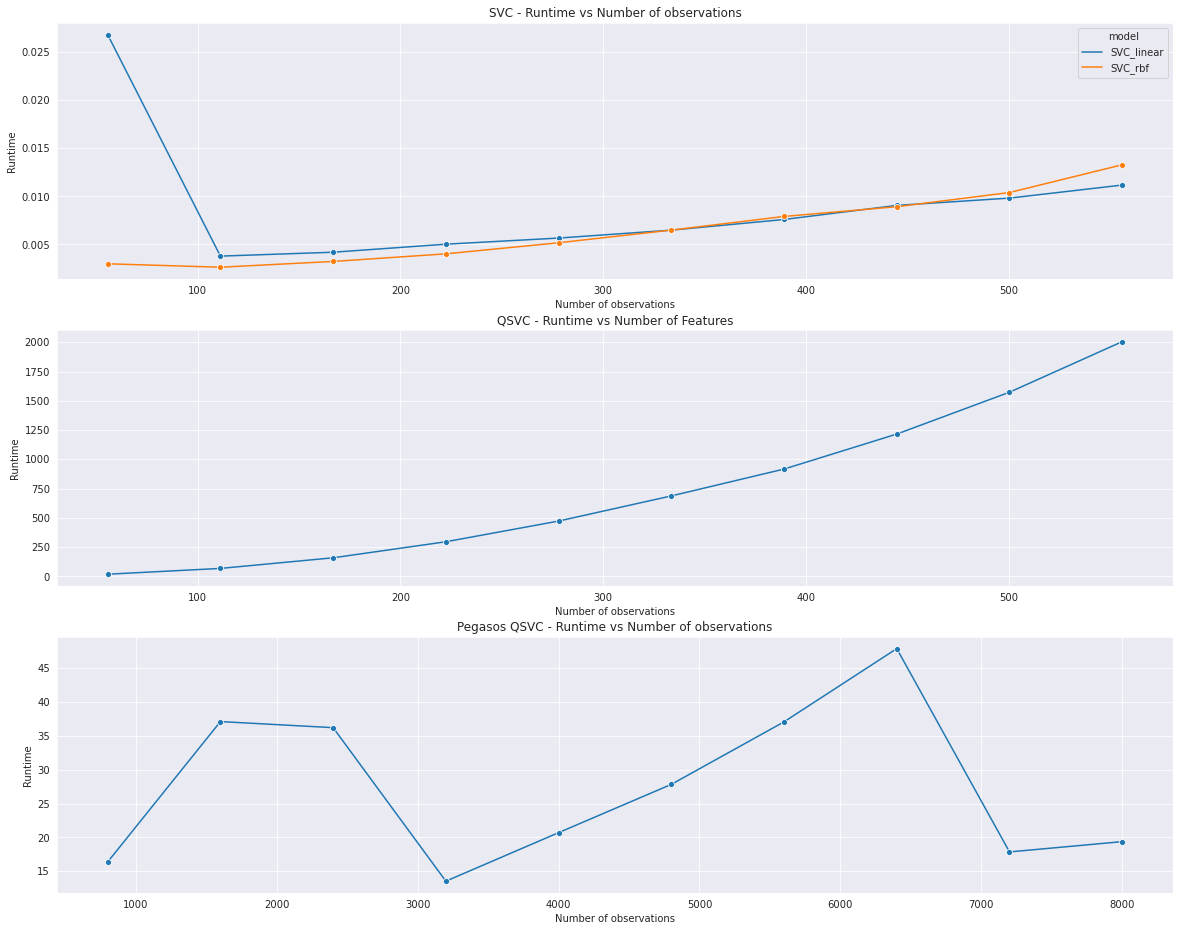

In [20]:
svc_chart_gen_size()

### VQC Report

In [21]:
vqc_feature_list = os.listdir("vqc_results/runtime_features/")
vqc_feature_df = pd.DataFrame()
for data in vqc_feature_list:
    if ".csv" in data:
        new_df = pd.read_csv("vqc_results/runtime_features/" + data)
        vqc_feature_df = pd.concat([vqc_feature_df, new_df], axis = 0).reset_index(drop=True)

In [22]:
vqc_feature_df

,num_features,model,runtime
0,2.0,vqc_su2_spsa,7018.609967
1,3.0,vqc_su2_spsa,11965.351314
2,4.0,vqc_su2_spsa,17635.861241
3,5.0,vqc_su2_spsa,24721.506795
4,6.0,vqc_su2_spsa,33353.058726


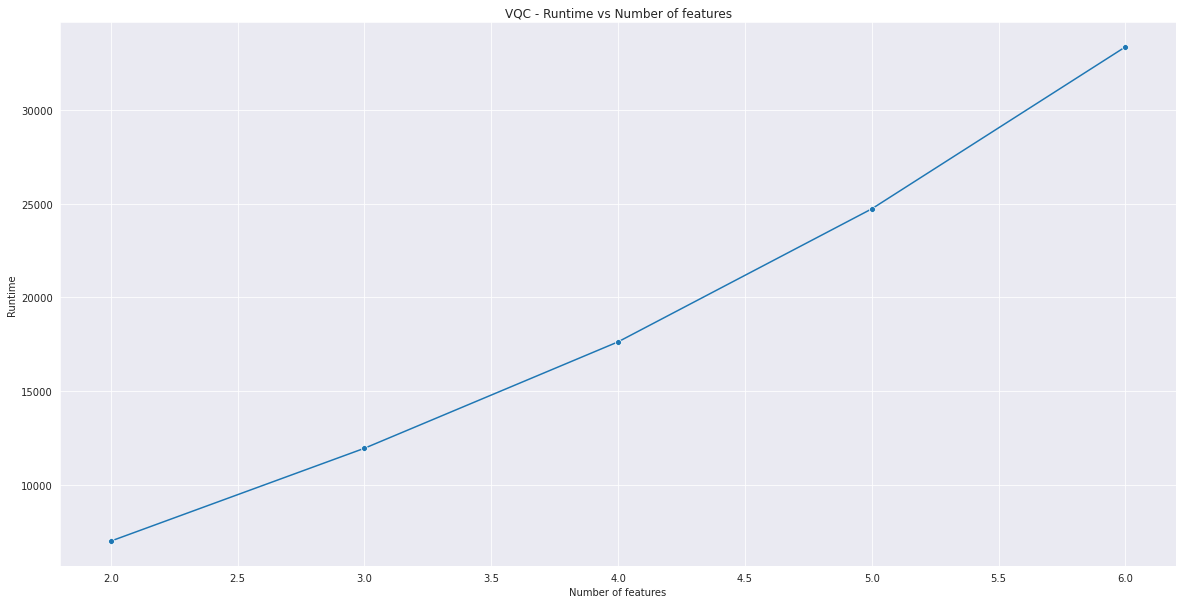

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "num_features", y = "runtime", data = vqc_feature_df, marker = "o")
#ax = axes[1]
plt.title("VQC - Runtime vs Number of features")
plt.ylabel("Runtime", fontsize=10)
plt.xlabel("Number of features", fontsize=10)
plt.show();

In [24]:
vqc_size_list = os.listdir("vqc_results/runtime_size/")
vqc_size_df = pd.DataFrame()
for data in vqc_size_list:
    if ".csv" in data:
        new_df = pd.read_csv("vqc_results/runtime_size/" + data)
        vqc_size_df = pd.concat([vqc_size_df, new_df], axis = 0).reset_index(drop=True)

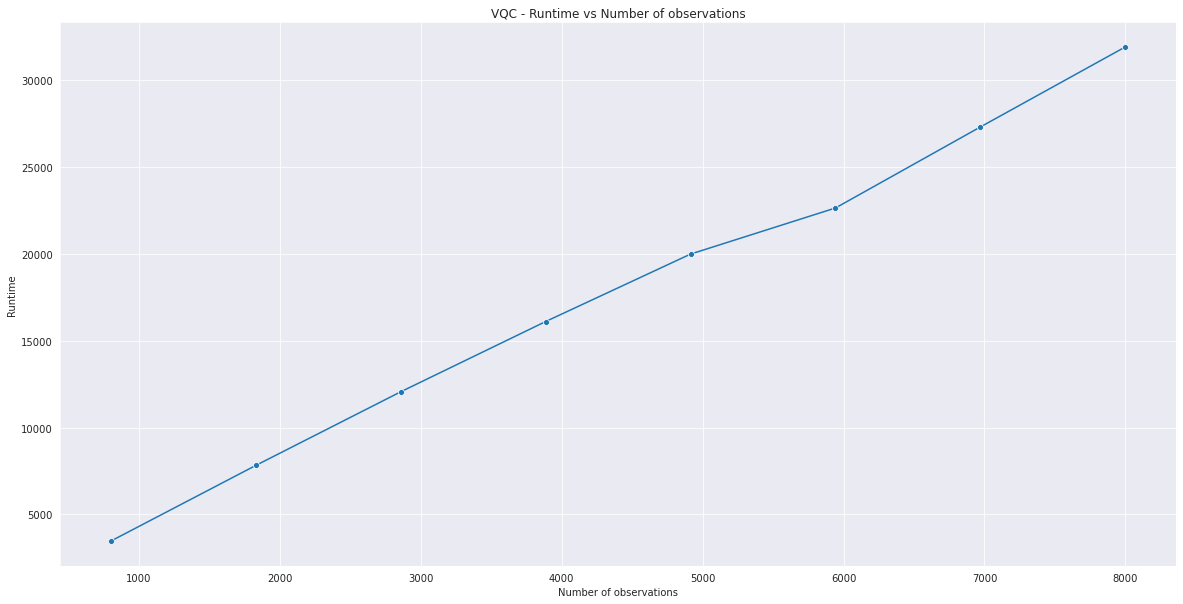

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "size", y = "runtime", data = vqc_size_df, marker="o")
#ax = axes[1]
plt.title("VQC - Runtime vs Number of observations")
plt.ylabel("Runtime", fontsize=10)
plt.xlabel("Number of observations", fontsize=10)
plt.show();